##### Data and library importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold,LeaveOneOut, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df_source = pd.read_csv('../data/bank_customer_churn.csv')

In [4]:
df= df_source.copy()

In [5]:
display(df)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##### Vue globale des data

In [6]:
#information sur les lignes et les colones
df.shape

(10000, 12)

In [7]:
#Nombre de clients unique
len(df["customer_id"].unique())

10000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


##### Analyse des valeurs (NAn et null), des doublons

In [9]:
# Détection les doublons
doublons = df[df.duplicated()]
print("Le nombre total de valeurs manquantes est :", len(doublons))

Le nombre total de valeurs manquantes est : 0


In [10]:
# Nombre total de valeurs manquantes (Null) dans l'ensemble de la DataFrame:
nbr_val_null = df.isna().sum().sum()
print("Le nombre total de valeurs manquantes est :", nbr_val_null)

Le nombre total de valeurs manquantes est : 0


# Separation & Selection valeur Qualitative et Quantitatif

In [11]:
df.drop(["customer_id"], inplace=True, axis=1)

In [12]:
# Selectionner les des variables numériques
numeric_cols = df.select_dtypes([np.number])
#numeric_cols.drop(["churn","customer_id"], inplace=True, axis=1)
numeric_cols

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [13]:
# Selectionner les des variables numériques
descrip_cols = df.select_dtypes([np.object_])
descrip_cols

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


##### Analyse des valeurs abérrantes, des distributions & analyse Univariée et Multivariée (Variables Quantitatives).

In [14]:
# distribution des variables qualitatives
numeric_cols.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


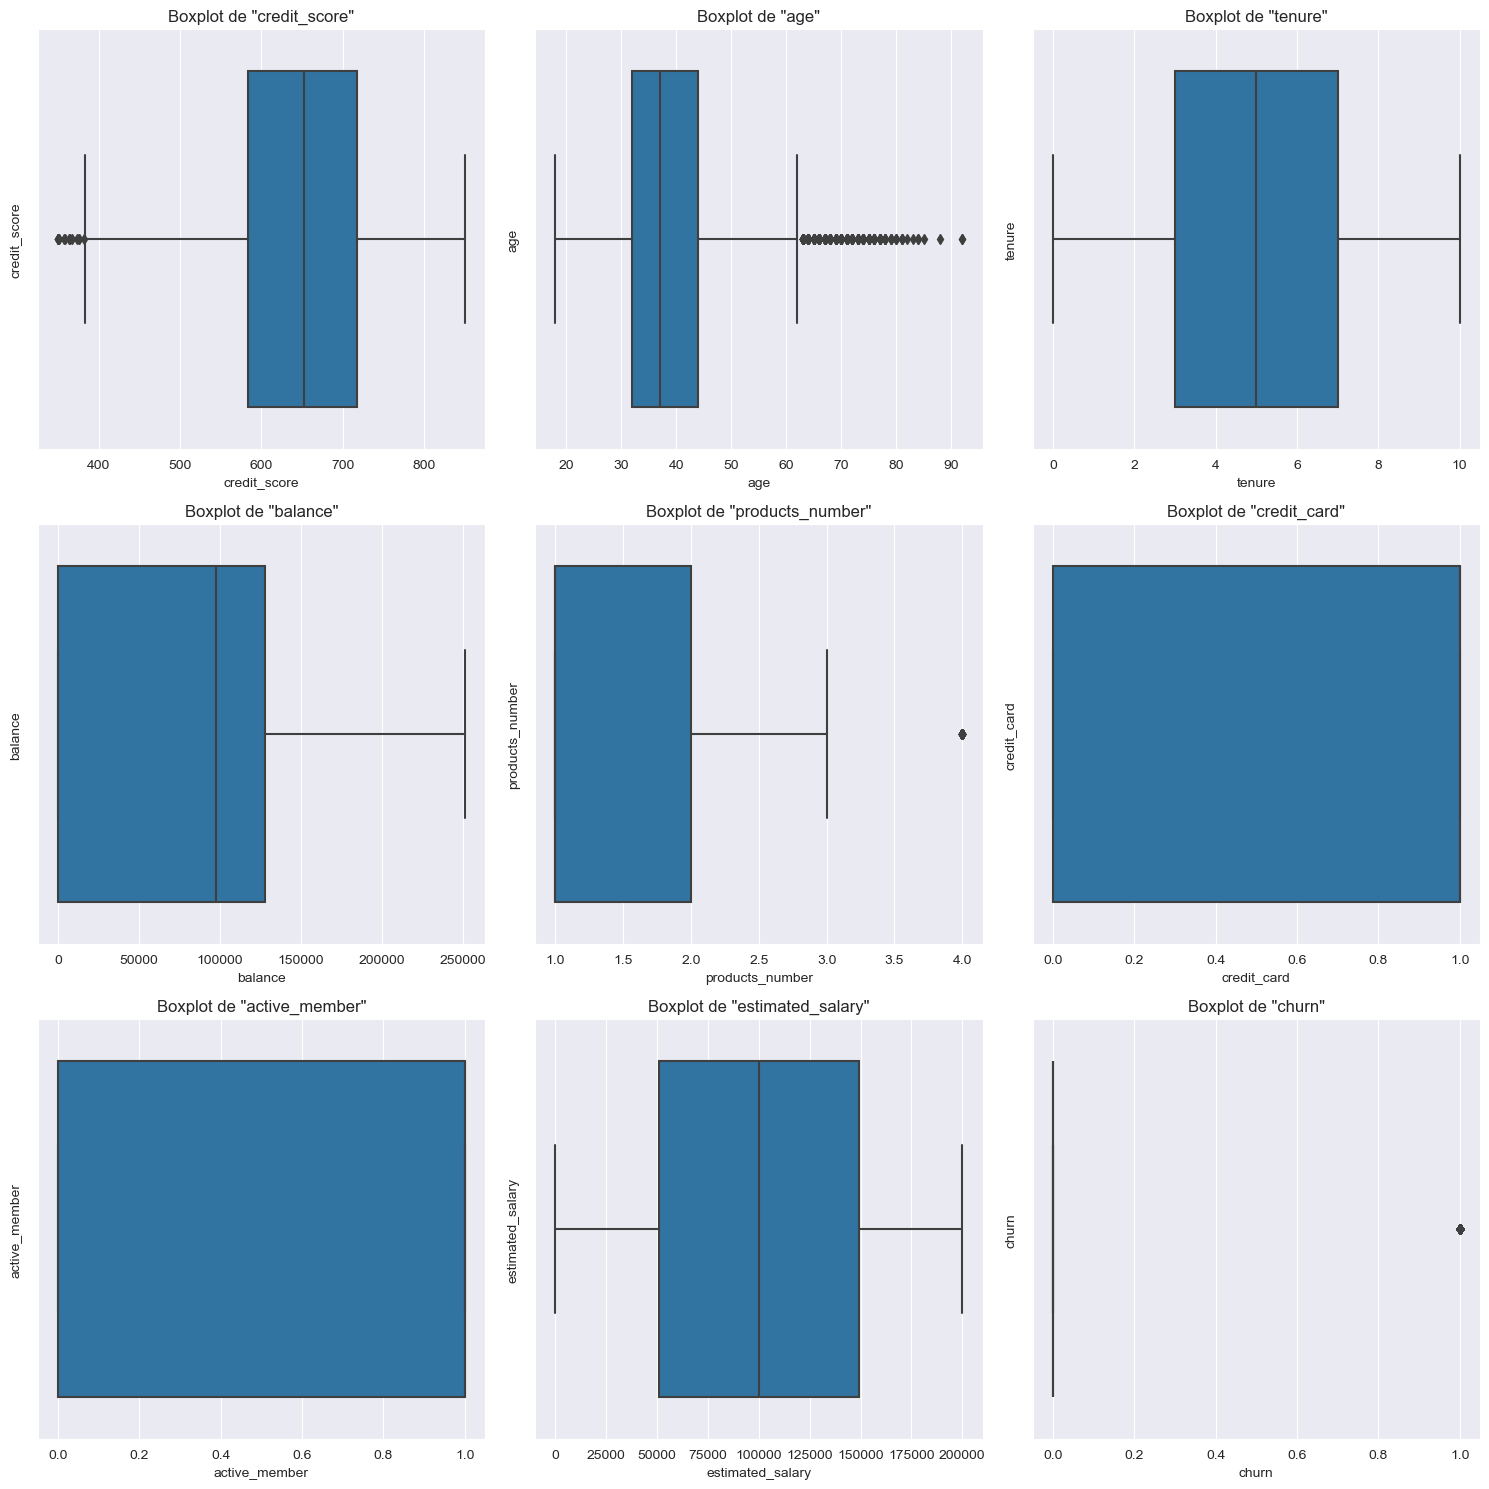

In [15]:

# Création de la grille de graphiques
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Itération sur les variables et les axes
for col, ax in zip(numeric_cols, axes.flatten()):
    sns.boxplot(data=df, x=col,  ax=ax)
    ax.set_title(f'Boxplot de "{col}"')
    ax.set_ylabel(col)

# Ajustement du placement des sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution de credit_score la durée en fonction')

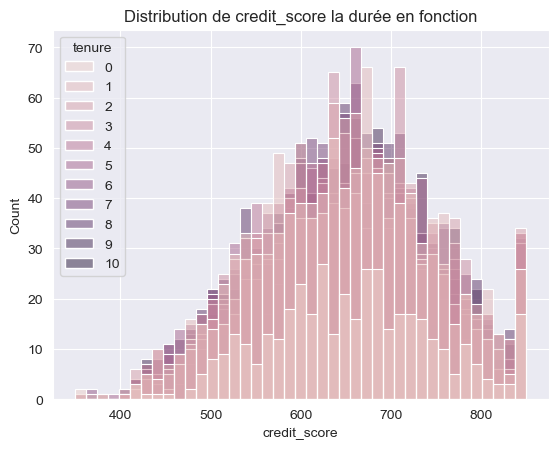

In [16]:
sns.histplot(data=df, x='credit_score',hue="tenure", kde=False).set_title(f'Distribution de credit_score la durée en fonction')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

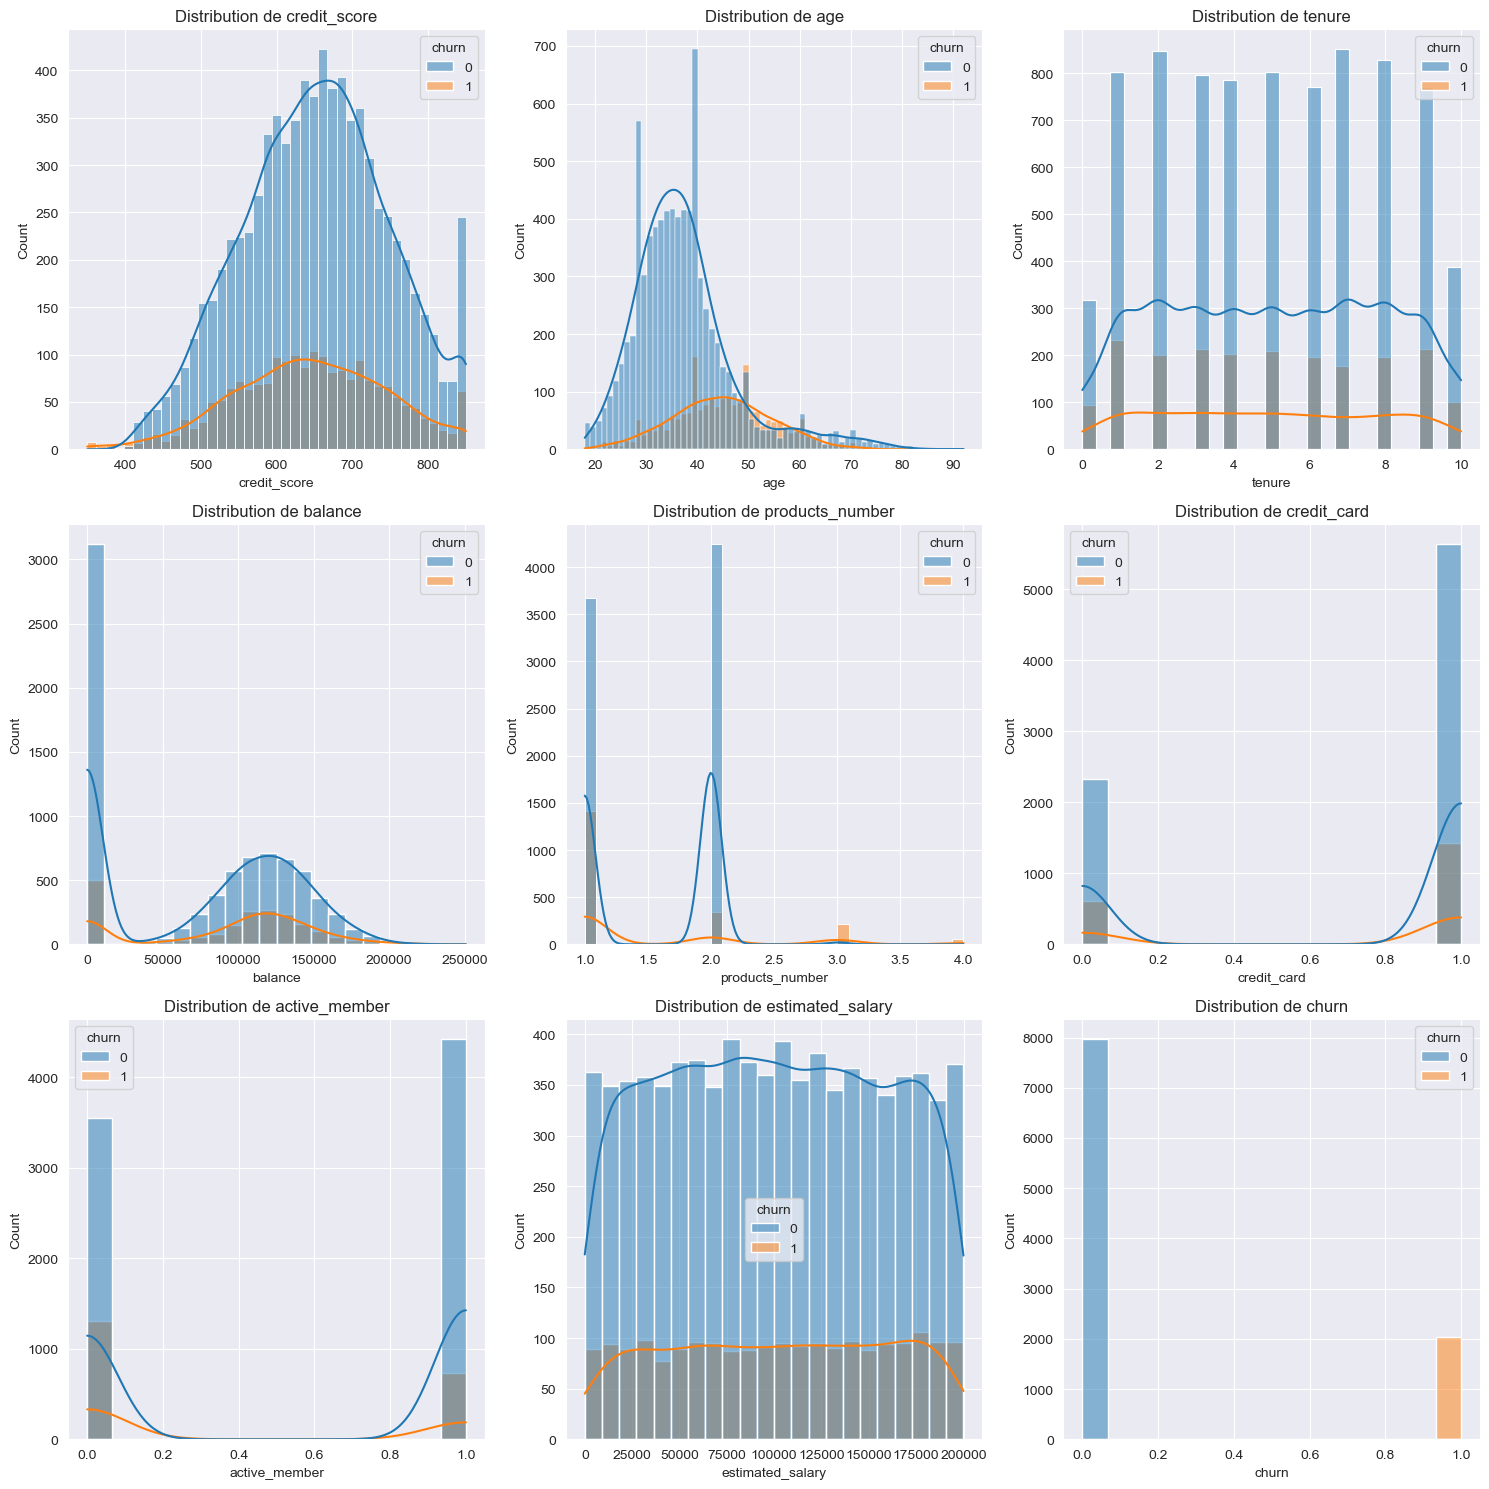

In [17]:
numeric_cols_title = numeric_cols.columns
# Nombre de colonnes dans la grille de graphiques
ncols = 3
nrows = int(len(numeric_cols_title) / ncols) + (len(numeric_cols_title) % ncols > 0)
hue= 'churn'

# Création de la figure et des axes pour la grille de sous-graphiques
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))

for col, ax in zip(numeric_cols_title, axes.flatten()):
    sns.histplot(data=df, x=col,hue=hue, kde=True, ax=ax)
    ax.set_title(f'Distribution de {col}')

# Ajustement pour éviter le chevauchement
plt.tight_layout()

# Affichage des graphiques
plt.show()

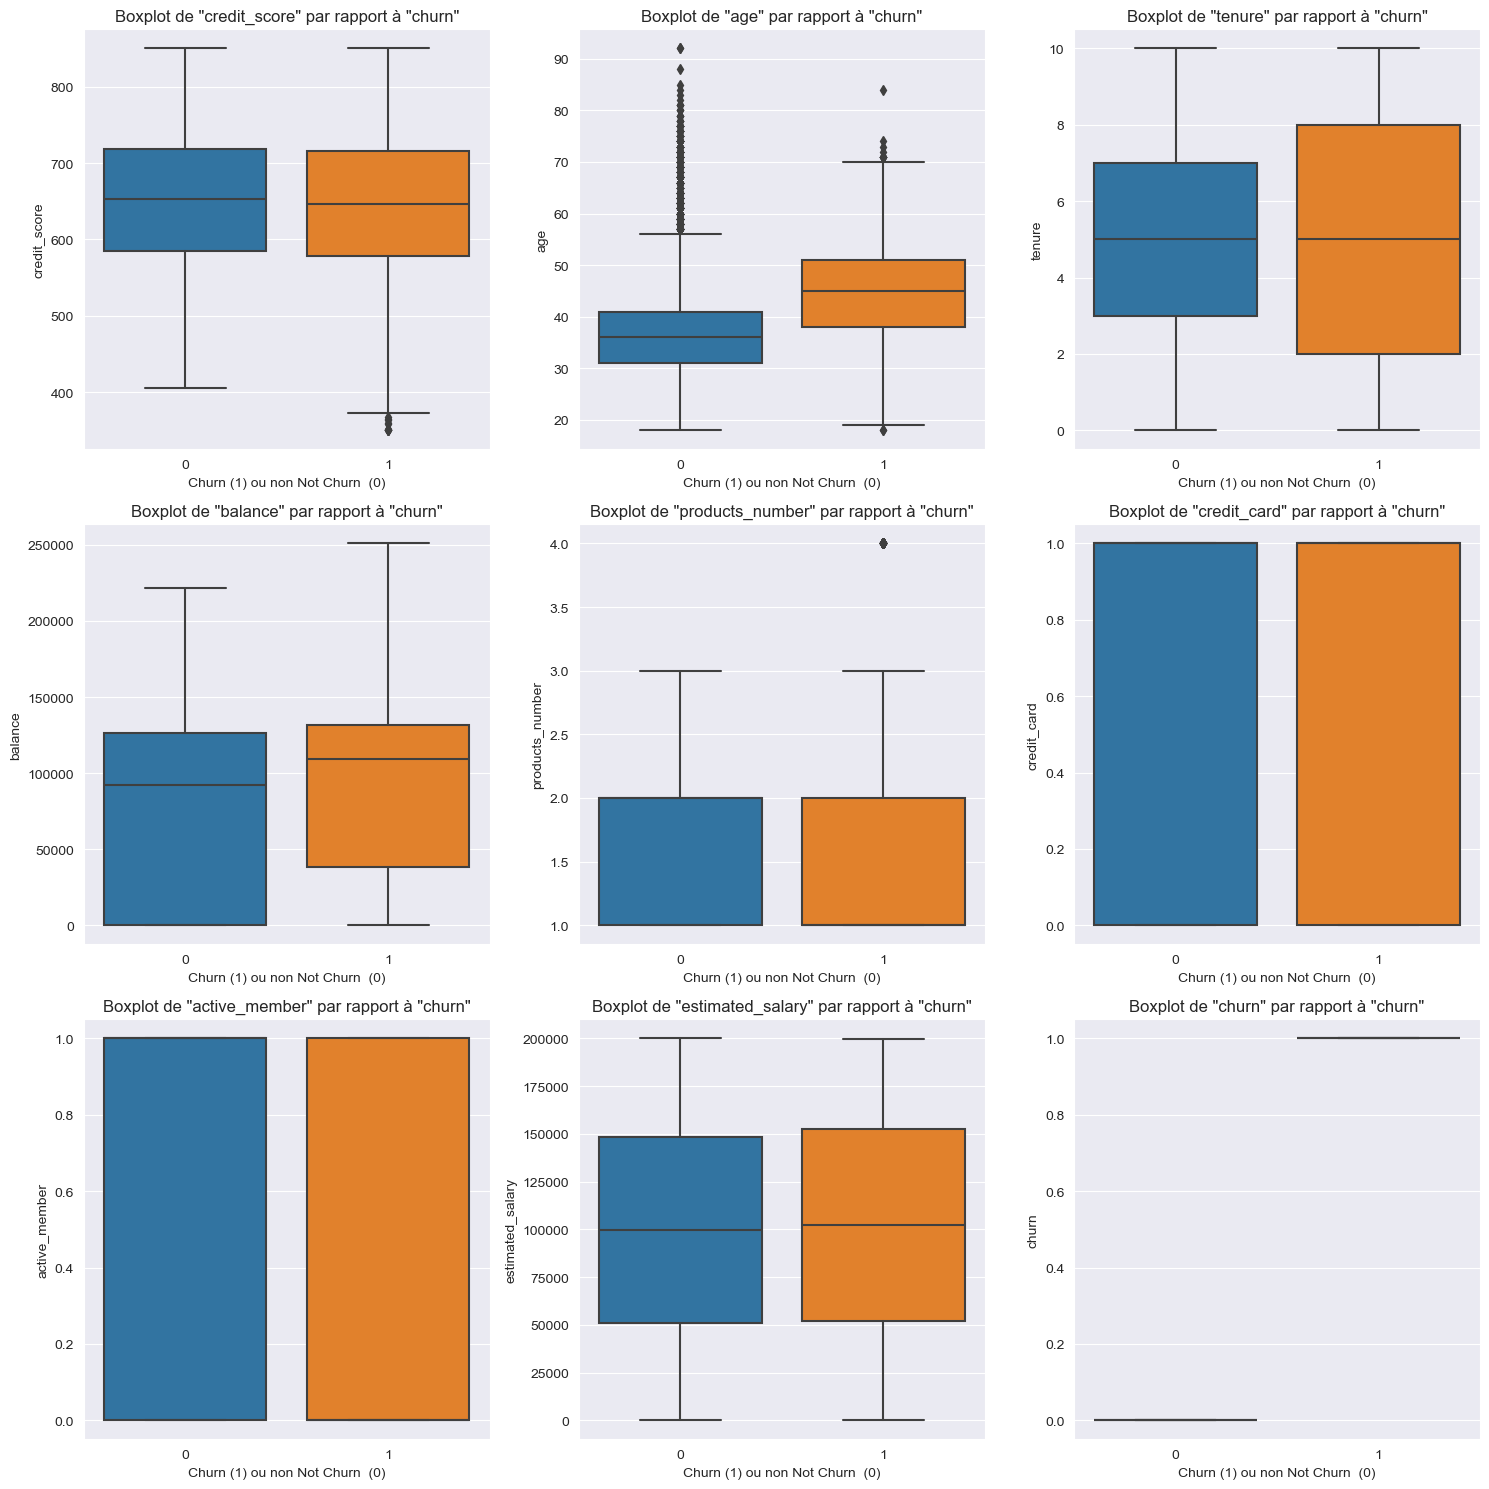

In [18]:
# Création de la grille de graphiques
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Itération sur les variables et les axes
for col, ax in zip(numeric_cols, axes.flatten()):
    sns.boxplot(data=df, x='churn', y=col, ax=ax)
    ax.set_title(f'Boxplot de "{col}" par rapport à "churn"')
    ax.set_xlabel('Churn (1) ou non Not Churn  (0)')
    ax.set_ylabel(col)

# Ajustement du placement des sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()

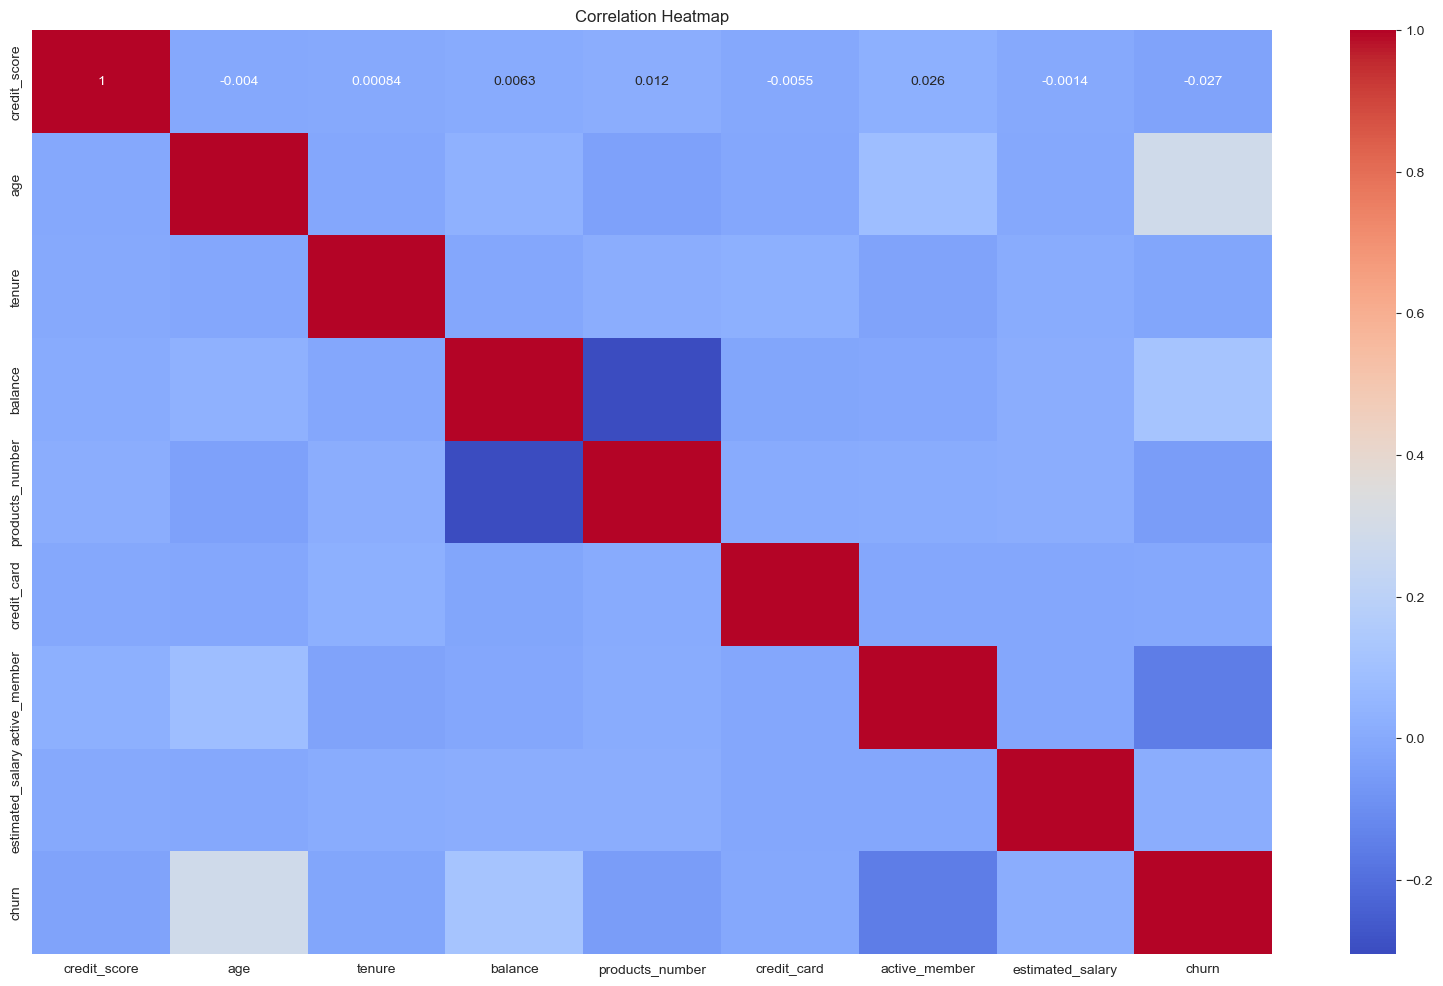

In [19]:
#  matrix de correlation
correlation_matrix = numeric_cols.corr()
plt.figure(figsize = (20,12))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Analyse  des distributions & analyse Univariée et Multivariée (Variables Qualitatives).

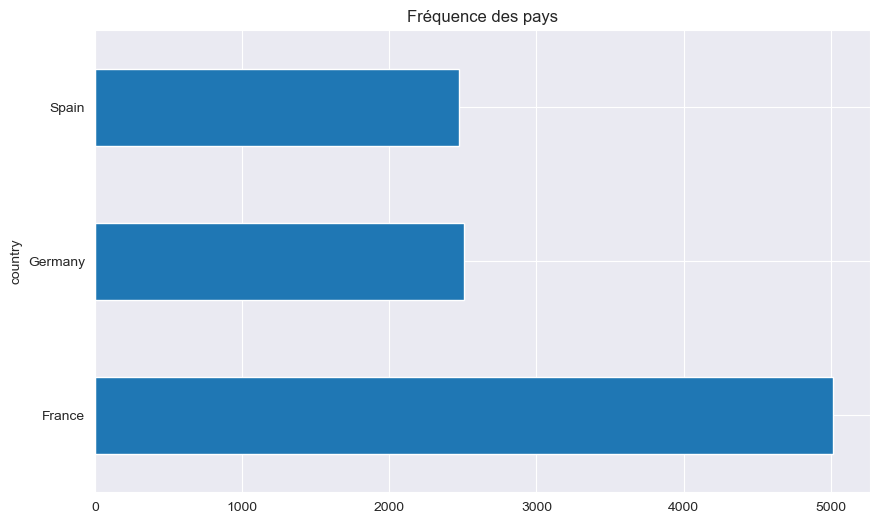

In [20]:
#  repartition statistique des pays
plt.figure(figsize=(10, 6))
plt.title('Fréquence des pays')
plt.xlabel('Fréquence')
plt.ylabel('nombre total de client par pays')
descrip_cols["country"].value_counts().plot.barh();

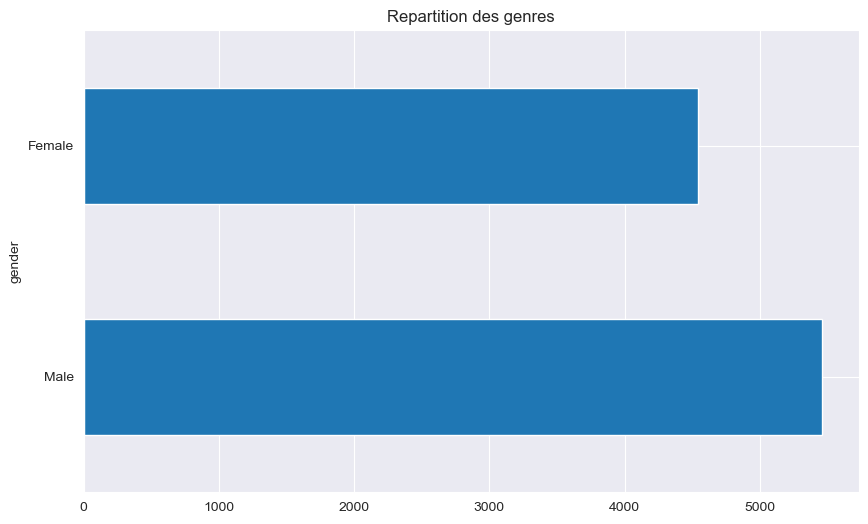

In [21]:

plt.figure(figsize=(10, 6))
plt.title('Repartition des genres')
plt.xlabel('Fréquence des genres')
plt.ylabel('Genres')
descrip_cols["gender"].value_counts().plot.barh();

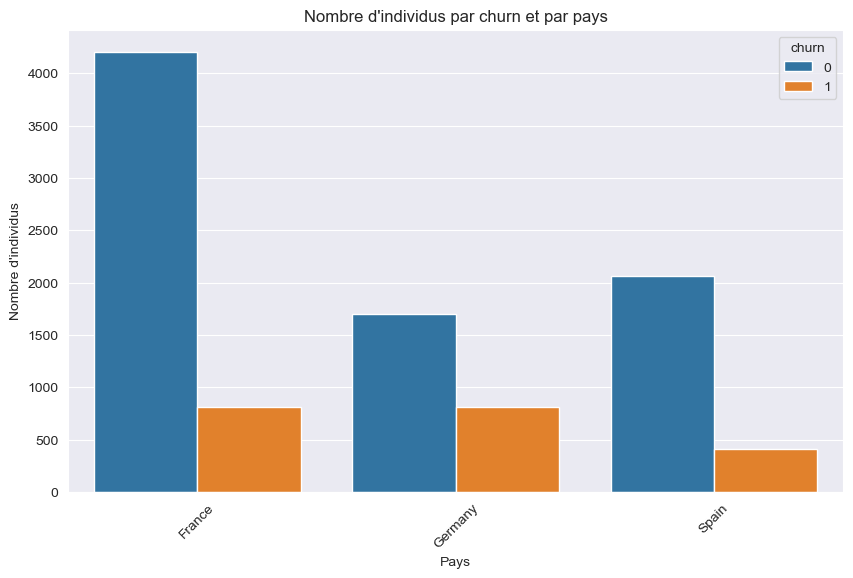

In [22]:
df['churn'] = df['churn'].astype(str)
df_aggregated = df.groupby(['country', 'churn']).size().reset_index(name='nombre')

# Création de l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(data=df_aggregated, x='country', y='nombre', hue='churn')

# Correction des titres et labels pour correspondre au contenu
plt.title('Nombre d\'individus par churn et par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=45)  # Rotation des labels sur l'axe des abscisses pour une meilleure lisibilité

plt.show()


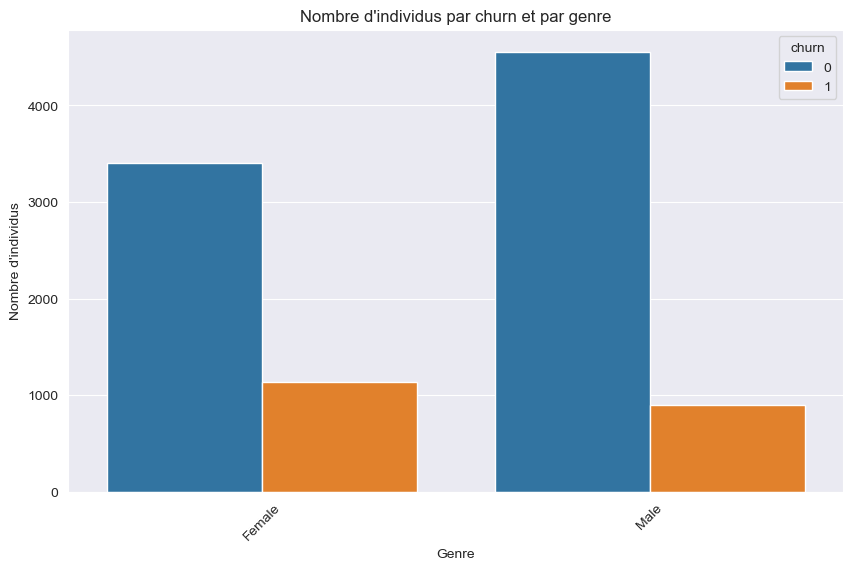

In [23]:
df['churn'] = df['churn'].astype(str)
df_aggregated = df.groupby(['gender', 'churn']).size().reset_index(name='nombre')

# Création de l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(data=df_aggregated, x='gender', y='nombre', hue='churn')

# Correction des titres et labels pour correspondre au contenu
plt.title('Nombre d\'individus par churn et par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=45)  # Rotation des labels sur l'axe des abscisses pour une meilleure lisibilité

plt.show()

#### Analyse nuage de point

#### Encodage des variables Qualitatives (OneHotEncoder)

In [24]:
# Initialiser OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Sélectionner les colonnes à encoder
columns_to_encode = ['gender', 'country']

# Appliquer l'encodage One-Hot
df_encoded = encoder.fit_transform(df[columns_to_encode])

# Créer un DataFrame avec les colonnes encodées
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# Supprimer les colonnes originales de 'df'
df.drop(columns=columns_to_encode, inplace=True)

# Joindre les nouvelles colonnes encodées à 'df'
df = df.join(df_encoded)

print(df)

      credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary churn  gender_Female  gender_Male  \
0           

#### Separation donnée

In [25]:
# Séparation des données en variables prédictives et variable cible
X = df.drop('churn', axis=1)  # Variables prédictives
y = df['churn'].astype(int)  # Variable cible`

#### Clustering avec Kmeans

In [26]:
#Standardisation pour le clustering
X_for_clustering = StandardScaler().fit_transform(X)

In [27]:
K = range(2, 8)
fits = []
score = []


for k in K:
    #entraînement du modèle pour la valeur actuelle de k sur les données d'entraînement
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_for_clustering)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_for_clustering, model.labels_, metric='euclidean'))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Score')

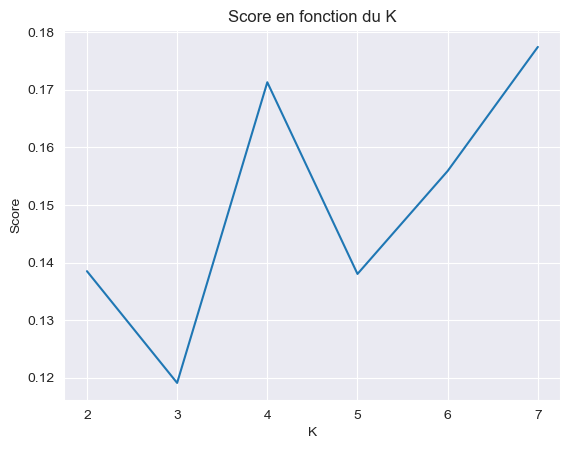

In [28]:
fig, ax = plt.subplots()
sns.lineplot(x = K, y = score,ax=ax)
ax.set_title(f'Score en fonction du K')
ax.set_xlabel('K')
ax.set_ylabel("Score")

In [29]:
# Application de l'algorithme K-means avec n_init défini explicitement
kmeans = KMeans(n_clusters=3, n_init='auto')  # vous pouvez changer 10 par un autre nombre si vous le souhaitez
kmeans.fit(X_for_clustering)

# Obtenir les étiquettes des clusters pour chaque point
labels = kmeans.labels_

cluster_dataframe = df_source.copy()

print("Nombre de points de données:", len(cluster_dataframe))
print("Nombre d'étiquettes:", len(labels))

cluster_dataframe["cluster"] = labels  # Ajout des labels de cluster au DataFrame d'origine
# Afficher les labels pour voir à quel cluster chaque point de données appartient
display(cluster_dataframe)

Nombre de points de données: 10000
Nombre d'étiquettes: 10000


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cluster
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,2
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


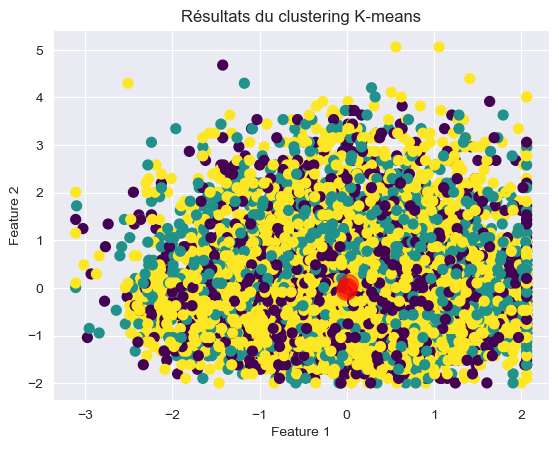

In [30]:
#Predire
y_kmeans = kmeans.predict(X_for_clustering)
# Visualisation des résultats
plt.scatter(X_for_clustering[:, 0], X_for_clustering[:, 1], c=y_kmeans, s=50, cmap='viridis')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.title("Résultats du clustering K-means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Traitement Pipeline 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir un pipeline avec un placeholder pour le 'model'
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', RandomForestClassifier())  # Placeholder pour le modèle
])

# Espace de recherche avec le modèle inclus dans le pipeline
search_space = [
    {
        'model': [DecisionTreeClassifier(random_state=42)],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 4, 6, 8, 10],
        'model__criterion':['gini','entropy','log_loss'],
        'model__splitter':['best','random']

    },
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [10, 100, 1000],
        'model__max_features': [1, 2, 3]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 11],
        'model__weights': ['uniform', 'distance']
    },
    {
        'model': [LogisticRegression()],
        'model__C': [0.1, 1, 10],
        'model__penalty': ['l2']
    }
]


# Stratégies de validation croisée
cv_strategies = {
    "KFold": KFold(n_splits=5, random_state=42, shuffle=True),
    "StratifiedKFold": StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
   # "LeaveOneOut": LeaveOneOut()
}

best_models=[]

# Déclarations initiales pour stocker les résultats
fpr_dict = {}
tpr_dict = {}
all_auc = []

for name, cv_strategy in cv_strategies.items():

    grid_search = GridSearchCV(estimator=pipeline, param_grid=search_space, cv=cv_strategy,  verbose=1, n_jobs=-1)

    # Exécuter GridSearchCV et obtenir le meilleur modèle
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    # Ajouter le meilleur modèle à la liste
    best_models.append(best_model)
    
    # Prédictions et probabilités pour les ensembles d'entraînement et de test
    y_pred_test = best_model.predict(X_test)
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

    # Calculer les taux de vrais positifs et de faux positifs pour le train et le test
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)

    # Calculer l'AUC pour l'ensemble de test
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)


    # Stockage des résultats dans les dictionnaires
    fpr_dict[name] = fpr_test
    tpr_dict[name] = tpr_test
    all_auc.append((name, roc_auc_test))
    
    print(f"Results with {name}:")
    print("Best parameters: ", grid_search.best_params_)
    print("Best Model: ", grid_search.best_estimator_)
    print("All Model result: ", grid_search.cv_results_.values())
    print("Accuracy: ", accuracy_score(y_test, y_pred_test))
    print("Precision: ", precision_score(y_test, y_pred_test, average='weighted', zero_division=0))
    print("Recall: ", recall_score(y_test, y_pred_test, average='weighted', zero_division=0))
    print("F1 Score: ", f1_score(y_test, y_pred_test, average='weighted', zero_division=0))
    print("ROC AUC: ", roc_auc_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    
    print("---" * 20)


Fitting 5 folds for each of 138 candidates, totalling 690 fits
Results with KFold:
Best parameters:  {'model': RandomForestClassifier(max_features=2, n_estimators=1000, random_state=42), 'model__max_features': 2, 'model__n_estimators': 1000}
Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('reduce_dim', PCA()),
                ('model',
                 RandomForestClassifier(max_features=2, n_estimators=1000,
                                        random_state=42))])
All Model result:  dict_values([array([2.65848446e-01, 2.54614830e-02, 1.73489428e-01, 1.84611320e-02,
       1.57666731e-01, 1.69920444e-02, 1.74424696e-01, 1.79880142e-02,
       1.57924557e-01, 1.95909023e-02, 1.04445219e-01, 1.26481533e-02,
       1.18263388e-01, 1.71148300e-02, 1.20477057e-01, 1.59936428e-02,
       1.41888762e-01, 1.61524773e-02, 1.15791988e-01, 1.36433601e-02,
       1.88509703e-01, 1.90535545e-02, 1.64208555e-01, 2.06120968e-02,
       1.93976688e-01, 1.71120644e-02, 2.11761618e-01, 1.

#### Methode d'ensemble

In [32]:
# Création des noms des modèles pour VotingClassifier
model_names = [f"model_{i}" for i in range(len(best_models))]

# Créer le modèle d'ensemble
ensemble_model = VotingClassifier(estimators=list(zip(model_names, best_models)), voting='soft')

# Entraîner le modèle d'ensemble sur l'ensemble d'entraînement complet
ensemble_model.fit(X_train, y_train)

# Prédire et évaluer le modèle d'ensemble sur l'ensemble de test
y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]

ensemble_roc_auc_test = roc_auc_score(y_test, y_pred_proba_ensemble)

# Calculer les taux de vrais positifs et de faux positifs pour le train et le test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_ensemble)
# Stockage des résultats dans les dictionnaires
fpr_dict['ensemble'] = fpr_test
tpr_dict['ensemble'] = tpr_test
all_auc.append(('ensemble', ensemble_roc_auc_test))

# Évaluer les performances
print("Accuracy: ", accuracy_score(y_test, y_pred_ensemble))
print("Precision: ", precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0))
print("Recall: ", recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=0))
print("F1 Score: ", f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=0))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

Accuracy:  0.8635
Precision:  0.8533843984962406
Recall:  0.8635
F1 Score:  0.8514485634076179
ROC AUC:  0.8544931446549843
Confusion Matrix:
 [[1541   66]
 [ 207  186]]


#### courbes ROC

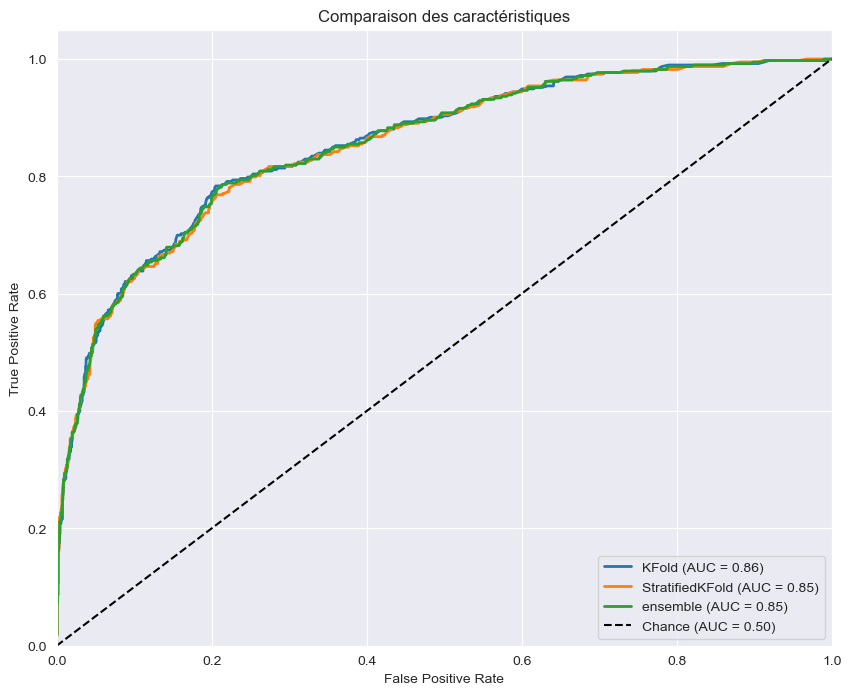

In [33]:
plt.figure(figsize=(10, 8))
for model_auc in all_auc:
    label, auc_score = model_auc
    plt.plot(fpr_dict[label], tpr_dict[label], label=f'{label} (AUC = {auc_score:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison des caractéristiques')
plt.legend(loc="lower right")
plt.show()